In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [14]:
df = pd.read_csv("C:/Users/mithi_l0ihziv/Downloads/flipkart_smartphones.csv", encoding='latin1')

In [15]:
df.head() 

brand             model           colour  original_price  \
0    VIVO      VIVO T1 44W        Starry Sky         19990.0   
1   APPLE  APPLE IPHONE 11             White         48900.0   
2    VIVO      VIVO T1 44W   Midnight Galaxy         20990.0   
3  XIAOMI       POCO M4 5G       Power Black         15999.0   
4  XIAOMI         REDMI 10   Caribbean Green         14999.0   

   discounted_price  ratings  quantity_ordered  reviews  memory  storage  \
0           14499.0      4.5           87331.0   6044.0     4.0    128.0   
1           47199.0      4.6          184191.0  10818.0     4.0    128.0   
2           15999.0      4.4           51365.0   3750.0     6.0    128.0   
3           11999.0      4.2           53448.0   4185.0     4.0     64.0   
4            9299.0      4.3          187787.0  12084.0     4.0     64.0   

                 processor        rear_camera front_camera  display_size  \
0  Qualcomm Snapdragon 680  50MP + 2MP + 2MP          16MP         16.36   
1            A Bionic Chip       12MP + 12MP          12MP         15.49   
2  Qualcomm Snapdragon 680  50MP + 2MP + 2MP          16MP         16.36   
3   Mediatek Dimensity 700        50MP + 2MP           8MP         16.71   
4  Qualcomm Snapdragon 680        50MP + 2MP           5MP         17.02   

   battery_capacity      battery_type  Unnamed: 16        profit  
0            5000.0  Lithium polymer           NaN  4.795345e+08  
1            3110.0       Lithium ion          NaN  3.133089e+08  
2            5000.0  Lithium polymer           NaN  2.563627e+08  
3            5000.0   Lithium Polymer          NaN  2.137920e+08  
4            6000.0   Lithium Polymer          NaN  1.070386e+09

In [16]:
df.shape

(838, 18)

In [17]:
df.isnull().sum()

brand                 2
model                 2
colour                7
original_price        2
discounted_price      2
ratings               2
quantity_ordered      2
reviews               2
memory                6
storage               4
processor            32
rear_camera           2
front_camera          5
display_size          2
battery_capacity      2
battery_type          2
Unnamed: 16         838
profit                2
dtype: int64

In [18]:
boughts = df.groupby('model').agg({'quantity_ordered': 'sum'}).sort_values('quantity_ordered',ascending=False)[:10]
boughts

quantity_ordered
model                                   
APPLE IPHONE 13                1525208.0
APPLE IPHONE 12                1495832.0
APPLE IPHONE 11                1289337.0
REDMI NOTE 5 PRO               1171704.0
REDMI 9I                       1154544.0
SAMSUNG GALAXY F23 5G          1056078.0
POCO M2 PRO                    1052232.0
REDMI 8                         942649.0
POCO M4 PRO                     930376.0
REALME C11 2021                 882498.0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'APPLE IPHONE 13 '),
  Text(1, 0, 'APPLE IPHONE 12 '),
  Text(2, 0, 'APPLE IPHONE 11 '),
  Text(3, 0, 'REDMI NOTE 5 PRO '),
  Text(4, 0, 'REDMI 9I '),
  Text(5, 0, 'SAMSUNG GALAXY F23 5G '),
  Text(6, 0, 'POCO M2 PRO '),
  Text(7, 0, 'REDMI 8 '),
  Text(8, 0, 'POCO M4 PRO '),
  Text(9, 0, 'REALME C11 2021 ')])

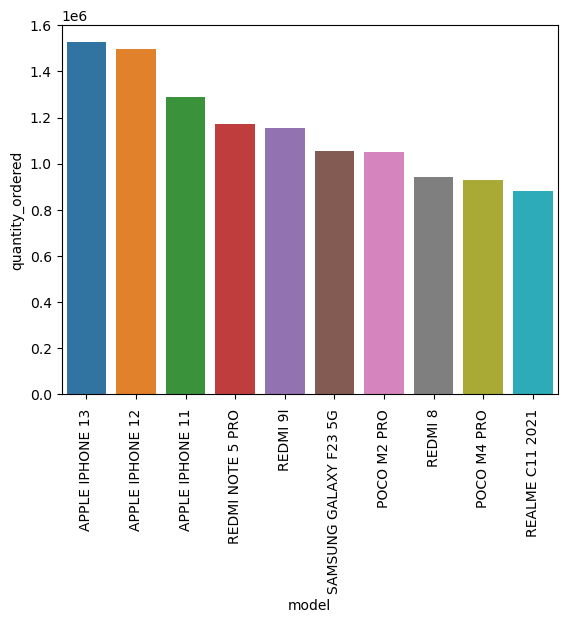

In [19]:
sns.barplot(x='model',y='quantity_ordered',data=boughts.reset_index())
plt.xticks(rotation = 'vertical')

In [23]:
profitable_products = pd.DataFrame(df.groupby(['model']).sum()['profit'])
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_products.head(10)

profit
model                                  
APPLE IPHONE 13            1.433848e+10
APPLE IPHONE 12            1.181857e+10
MOTO C PLUS                8.041880e+09
SAMSUNG GALAXY F23 5G      7.456137e+09
APPLE IPHONE 12 MINI       7.135562e+09
POCO C3                    6.981871e+09
POCO M4 PRO                5.041892e+09
REDMI 6                    5.034177e+09
SAMSUNG GALAXY S21 FE 5G   4.329960e+09
REDMI 7A                   4.278648e+09

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'APPLE IPHONE 13 '),
  Text(1, 0, 'APPLE IPHONE 12 '),
  Text(2, 0, 'MOTO C PLUS '),
  Text(3, 0, 'SAMSUNG GALAXY F23 5G '),
  Text(4, 0, 'APPLE IPHONE 12 MINI '),
  Text(5, 0, 'POCO C3 '),
  Text(6, 0, 'POCO M4 PRO '),
  Text(7, 0, 'REDMI 6 '),
  Text(8, 0, 'SAMSUNG GALAXY S21 FE 5G '),
  Text(9, 0, 'REDMI 7A ')])

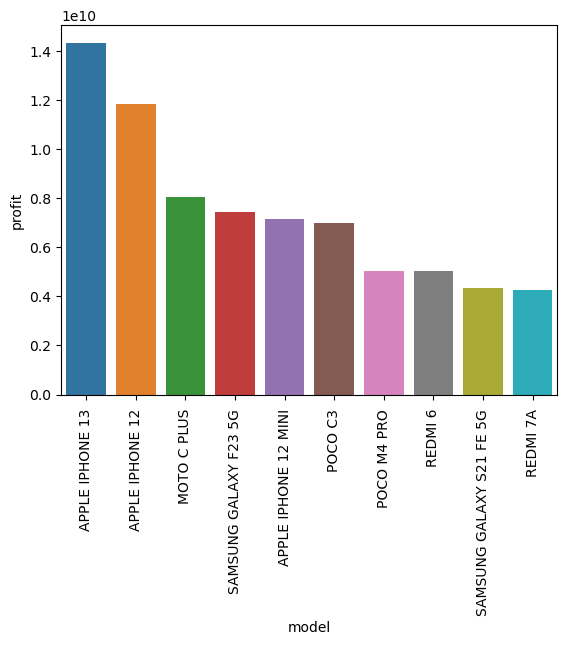

In [24]:
sns.barplot(x='model',y='profit',data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

In [25]:
df.groupby(['brand','quantity_ordered']).sum()

model  \
brand  quantity_ordered                                                      
APPLE  756.0             APPLE IPHONE 14 PRO APPLE IPHONE 14 PRO APPLE ...   
       769.0             APPLE IPHONE 14 PRO MAX APPLE IPHONE 14 PRO MA...   
       1421.0                                         APPLE IPHONE 13 PRO    
       4110.0            APPLE IPHONE 14 PLUS APPLE IPHONE 14 PLUS APPL...   
       16010.0           APPLE IPHONE 14 APPLE IPHONE 14 APPLE IPHONE 1...   
...                                                                    ...   
XIAOMI 422214.0                                             REDMI NOTE 7S    
       559353.0                                                   REDMI 6    
       577272.0                                         REDMI 9I REDMI 9I    
       942649.0                                                   REDMI 8    
       1171704.0                                         REDMI NOTE 5 PRO    

                                                                    colour  \
brand  quantity_ordered                                                      
APPLE  756.0             Space BlackGoldDeep PurpleSpace BlackSpace Bla...   
       769.0                              GoldSpace BlackDeep PurpleSilver   
       1421.0                                                       Silver   
       4110.0            MidnightPurpleStarlightPurpleStarlightBlueMidn...   
       16010.0           MidnightStarlightPurpleBluePurpleMidnightStarl...   
...                                                                    ...   
XIAOMI 422214.0                                                 Onyx Black   
       559353.0                                                       Gold   
       577272.0                                     Midnight BlackSea Blue   
       942649.0                                              Sapphire Blue   
       1171704.0                                                      Gold   

                         original_price  discounted_price  ratings   reviews  \
brand  quantity_ordered                                                        
APPLE  756.0                   829400.0          787994.0     28.2     378.0   
       769.0                   559600.0          511996.0     18.8     260.0   
       1421.0                  149900.0          122999.0      4.6     121.0   
       4110.0                 1118900.0         1020989.0     51.7    3234.0   
       16010.0                 869000.0          789990.0     47.0    6860.0   
...                                 ...               ...      ...       ...   
XIAOMI 422214.0                 17999.0           13999.0      4.4   34039.0   
       559353.0                 17999.0            8999.0      4.4   40463.0   
       577272.0                 19998.0           14998.0      8.6   67816.0   
       942649.0                 10999.0           10749.0      4.4   66962.0   
       1171704.0                17999.0           14999.0      4.5  122453.0   

                         memory  storage  \
brand  quantity_ordered                    
APPLE  756.0               36.0   1408.0   
       769.0               24.0    512.0   
       1421.0               6.0    512.0   
       4110.0              66.0   2688.0   
       16010.0             60.0   2176.0   
...                         ...      ...   
XIAOMI 422214.0             4.0     64.0   
       559353.0             3.0     32.0   
       577272.0             8.0    128.0   
       942649.0             4.0     64.0   
       1171704.0            4.0     64.0   

                                                                 processor  \
brand  quantity_ordered                                                      
APPLE  756.0             A Bionic Chip,  CoreA Bionic Chip,  CoreA Bion...   
       769.0             A Bionic Chip,  CoreA Bionic Chip,  CoreA Bion...   
       1421.0                                                A Bionic Chip   
       4110.0            A Bionic C

In [26]:
profitable_category = pd.DataFrame(df.groupby(['brand']).sum()['profit'])
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

profit
brand                 
XIAOMI    5.051258e+10
APPLE     3.729611e+10
SAMSUNG   2.095777e+10
REALME    1.716305e+10
MOTOROLA  1.350762e+10
VIVO      5.591766e+09
INFINIX   4.882750e+09
OPPO      3.643484e+09
NOTHING   1.859542e+09
GOOGLE    8.362454e+08
ITEL      1.436414e+08
MICROMAX  1.216968e+08
TECNO     5.902195e+07
NOKIA     2.597110e+07
I KALL    2.350400e+07
IQOO      5.647915e+06
ONEPLUS   4.997060e+06
MARQ      3.220000e+06
LAVA      2.444315e+06

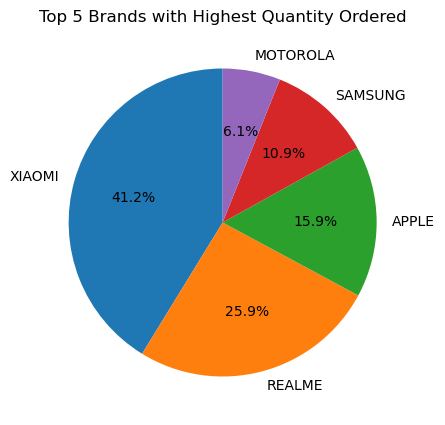

In [27]:
import matplotlib.pyplot as plt

# Group the data by brand and calculate the sum of quantity ordered
product_group = df.groupby('brand')
quantity_ordered = product_group.sum()['quantity_ordered']

# Get the top 5 brands with the highest quantity ordered
top_5 = quantity_ordered.nlargest(5)

# Plotting the pie chart
plt.figure(figsize=(17, 5))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Brands with Highest Quantity Ordered')
plt.show()


In [28]:
storage_category = pd.DataFrame(df.groupby(['storage']).sum()['quantity_ordered'])
storage_category.sort_values(by=['quantity_ordered'], inplace = True, ascending = False)
storage_category

quantity_ordered
storage                  
64.0           14767759.0
128.0          11395059.0
32.0            5358503.0
256.0           1636262.0
16.0             910296.0
512.0            602470.0
8.0              179388.0

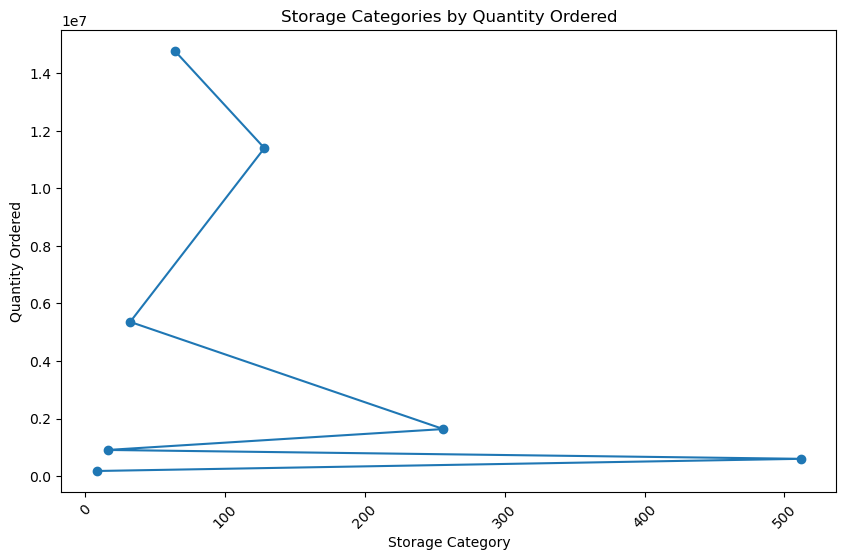

In [29]:
import matplotlib.pyplot as plt

# Assuming storage_category is your Pandas DataFrame

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(storage_category.index, storage_category['quantity_ordered'], marker='o')

# Customize the chart
plt.title('Storage Categories by Quantity Ordered')
plt.xlabel('Storage Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the chart
plt.show()

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


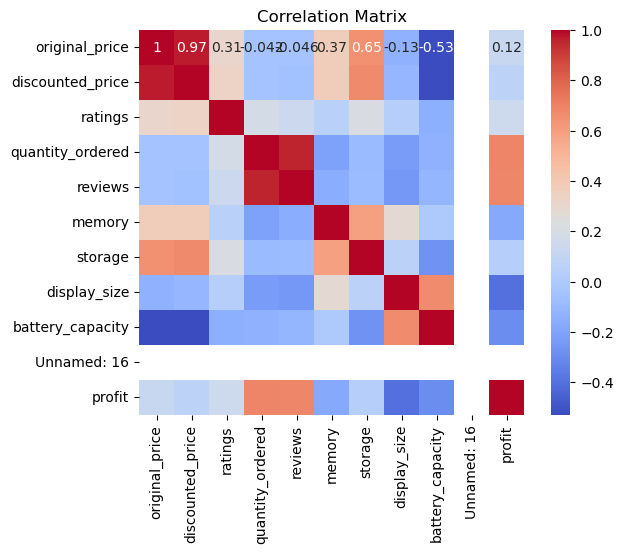

In [31]:
#select only the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

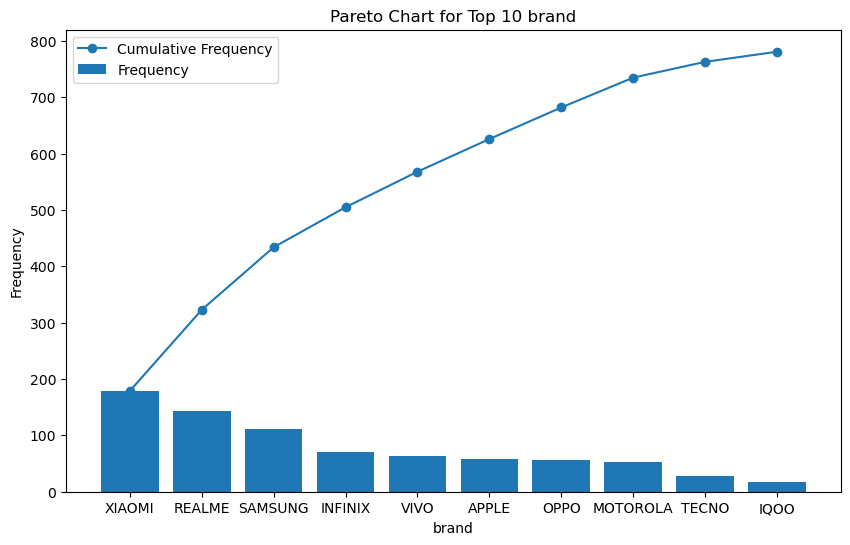

In [55]:
# Select a column to create the Pareto chart for
column = 'brand'

# Create a frequency table
freq_table = df[column].value_counts()

# Sort the frequency table by the top 10 values
top_10_freq_table = freq_table.nlargest(10)

# Calculate the cumulative frequency
cum_freq = top_10_freq_table.cumsum()

# Create a Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_freq_table.index, top_10_freq_table.values, label='Frequency')
plt.plot(cum_freq.index, cum_freq.values, label='Cumulative Frequency', marker='o')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.title('Pareto Chart for Top 10 ' + column)
plt.legend()
plt.show()

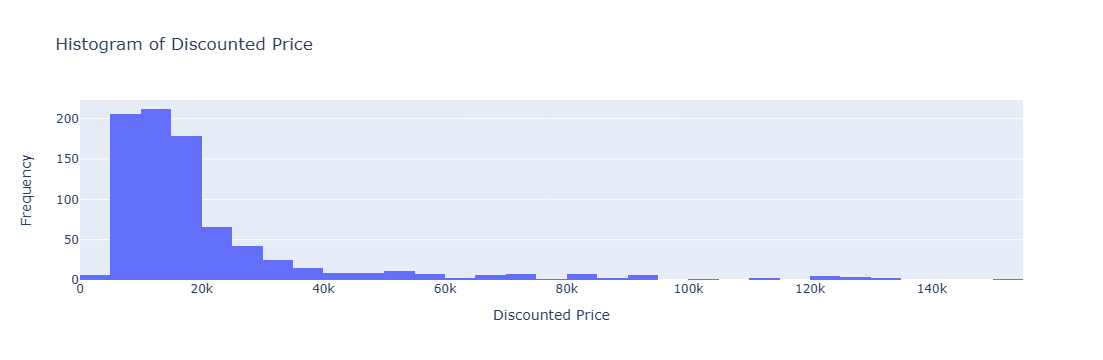

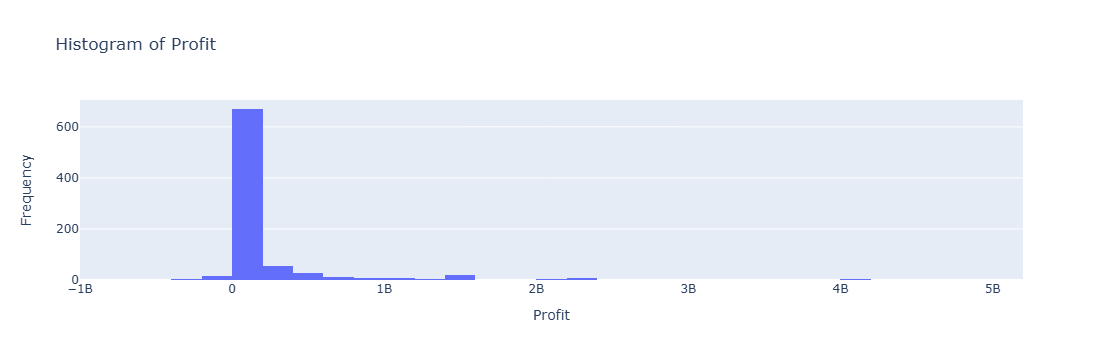

In [57]:
import plotly.graph_objects as go

# Create a histogram for the 'discounted_price' column
fig = go.Figure(data=[go.Histogram(x=df['discounted_price'], nbinsx=50)])
fig.update_layout(title='Histogram of Discounted Price', xaxis_title='Discounted Price', yaxis_title='Frequency')
fig.show()

# Create a histogram for the 'profit' column
fig = go.Figure(data=[go.Histogram(x=df['profit'], nbinsx=50)])
fig.update_layout(title='Histogram of Profit', xaxis_title='Profit', yaxis_title='Frequency')
fig.show()


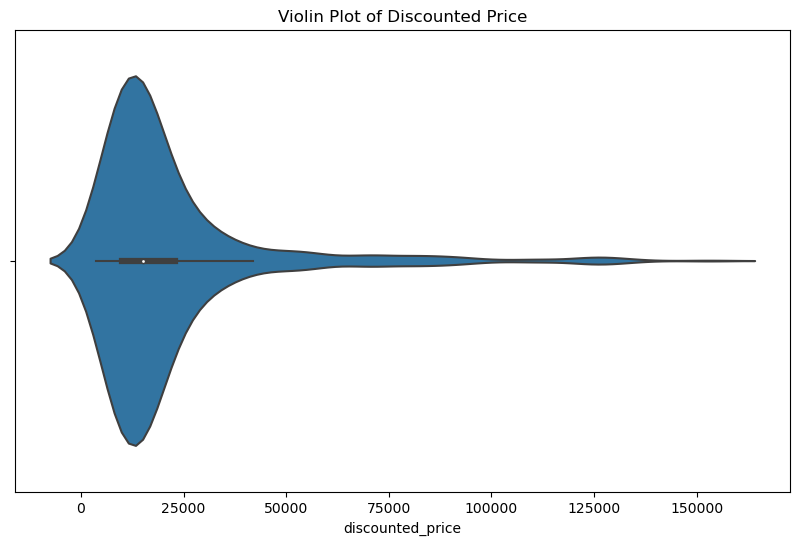

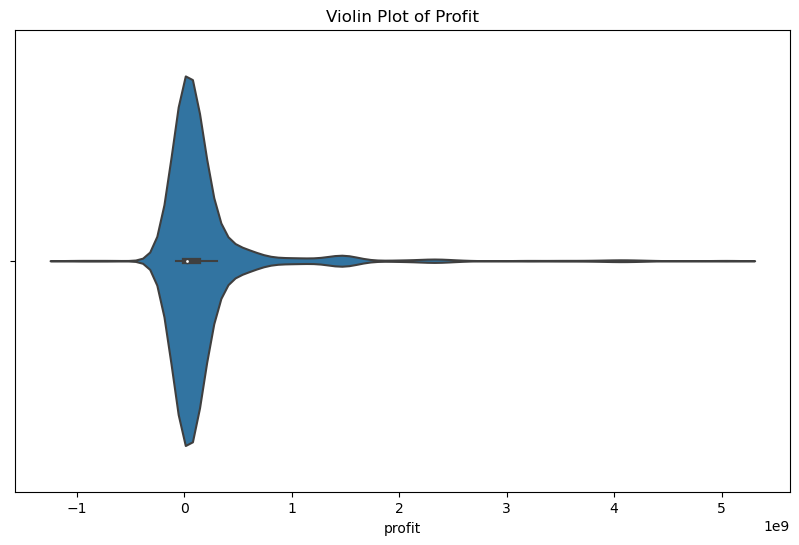

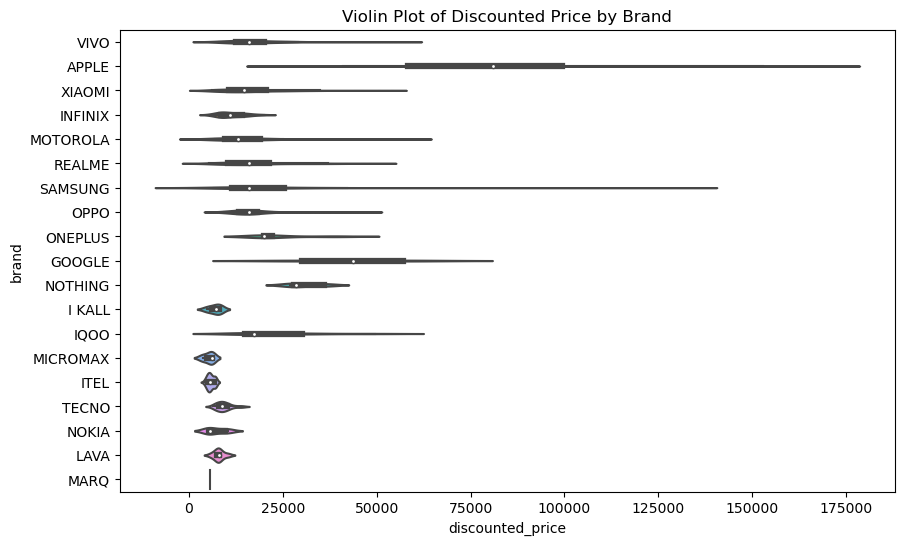

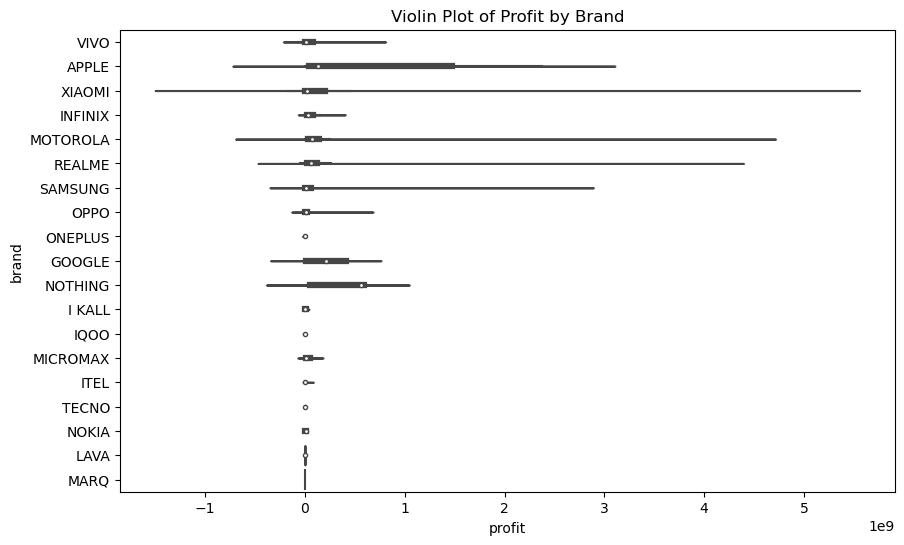

In [58]:
# Create a violin plot for the 'discounted_price' column
plt.figure(figsize=(10, 6))
sns.violinplot(x='discounted_price', data=df)
plt.title('Violin Plot of Discounted Price')
plt.show()

# Create a violin plot for the 'profit' column
plt.figure(figsize=(10, 6))
sns.violinplot(x='profit', data=df)
plt.title('Violin Plot of Profit')
plt.show()

# Create a violin plot for the 'discounted_price' column by 'brand'
plt.figure(figsize=(10, 6))
sns.violinplot(x='discounted_price', y='brand', data=df)
plt.title('Violin Plot of Discounted Price by Brand')
plt.show()

# Create a violin plot for the 'profit' column by 'brand'
plt.figure(figsize=(10, 6))
sns.violinplot(x='profit', y='brand', data=df)
plt.title('Violin Plot of Profit by Brand')
plt.show()

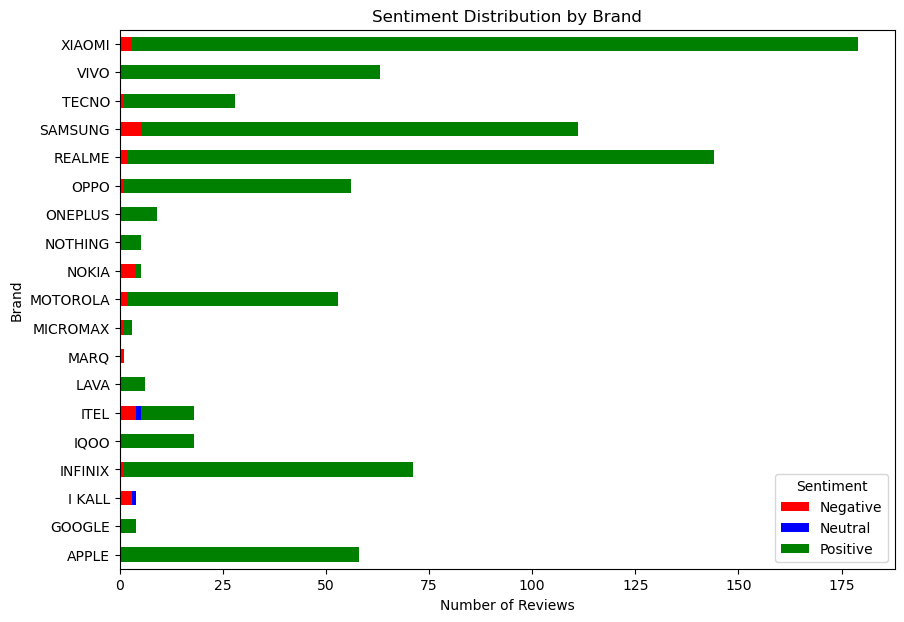

In [63]:
# Classify sentiment based on ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment classification
df['sentiment'] = df['ratings'].apply(classify_sentiment)

# Group by brand to count sentiment distribution
sentiment_by_brand = df.groupby(['brand', 'sentiment']).size().unstack(fill_value=0)

# Plot sentiment distribution for each brand
sentiment_by_brand.plot(kind='barh', stacked=True, figsize=(10, 7), color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Number of Reviews')
plt.ylabel('Brand')
plt.legend(title='Sentiment')
plt.show()

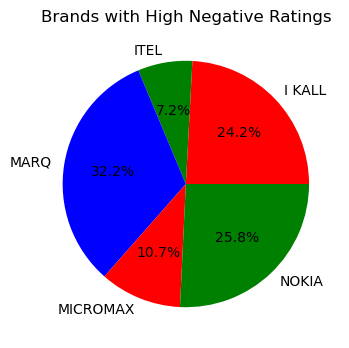

C:\Users\mithi_l0ihziv\AppData\Local\Temp\ipykernel_22824\4016888583.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



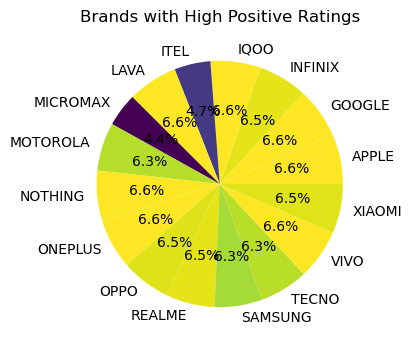

In [65]:
import matplotlib.cm as cm
# Classify sentiment based on ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment classification
df['sentiment'] = df['ratings'].apply(classify_sentiment)

# Group by brand and sentiment to count sentiment distribution
sentiment_distribution = df.groupby('brand')['sentiment'].value_counts().unstack()

# Calculate the percentage of negative ratings for each brand
negative_ratings_percentage = sentiment_distribution['Negative'] / sentiment_distribution.sum(axis=1) * 100

# Filter the brands with high negative ratings (e.g., above 20%)
high_negative_brands = negative_ratings_percentage[negative_ratings_percentage > 20]

# Plot the pie chart for high negative brands
plt.figure(figsize=(6, 4))
plt.pie(high_negative_brands, labels=high_negative_brands.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Brands with High Negative Ratings')
plt.show()

# Calculate the percentage of negative ratings for each brand
positive_ratings_percentage = sentiment_distribution['Positive'] / sentiment_distribution.sum(axis=1) * 100

# Filter the brands with high negative ratings (e.g., above 20%)
high_positive_brands = positive_ratings_percentage[positive_ratings_percentage > 20]

# Plot the pie chart for high negative brands
# Create a colormap to map slice sizes to colors
cmap = cm.get_cmap('viridis')
norm = plt.Normalize(vmin=high_positive_brands.min(), vmax=high_positive_brands.max())

# Plot the pie chart with customized colors
plt.figure(figsize=(6, 4))
plt.pie(high_positive_brands, labels=high_positive_brands.index, autopct='%1.1f%%', colors=[cmap(norm(size)) for size in high_positive_brands])
plt.title('Brands with High Positive Ratings')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("C:/Users/mithi_l0ihziv/Downloads/flipkart_smartphones.csv", encoding='latin1')

# Select features and target variable
X = df[["brand", "original_price", "ratings", "memory", "storage", "processor", "battery_capacity"]]
y = df["quantity_ordered"]

# Define the conditions to classify 'quantity_ordered' into 'High', 'Moderate', and 'Low'
def categorize_quantity(quantity):
    if quantity >= 50000:
        return "High"
    elif 20000 <= quantity < 50000:
        return "Moderate"
    else:
        return "Low"

# Apply the function to create a categorical target variable
y_class = y.apply(categorize_quantity)

# Handle missing values (drop rows with missing values)
X = X.dropna()
y_class = y_class.loc[X.index]

# Step 1: One-hot encode categorical features ('brand' and 'processor')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X[["brand", "processor"]])

# Convert the one-hot encoded data into a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(["brand", "processor"]))

# Step 2: Scale numeric features using StandardScaler
scaler = StandardScaler()
X_numeric = X.drop(columns=["brand", "processor"])

# Fit the scaler on the numeric training data
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Convert scaled numeric features to DataFrame
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

# Step 3: Combine scaled numeric data and encoded categorical features
X_combined = pd.concat([X_encoded_df.reset_index(drop=True), X_numeric_scaled_df.reset_index(drop=True)], axis=1)

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_class, test_size=0.2, random_state=42)

# Step 5: Train a logistic regression model for multiclass classification
model = LogisticRegression(multi_class='ovr')  # 'ovr' stands for one-vs-rest, suitable for multiclass classification
model.fit(X_train, y_train)

# Step 6: Predict on the testing set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report for detailed metrics
print(classification_report(y_test, y_pred, target_names=["Low", "Moderate", "High"]))

# Step 8: Example new data (replace this with your actual new data)
new_data = pd.DataFrame({
    "brand": ["XIAOMI", "REALME"],              # Example brands
    "original_price": [17999, 8000],           # Example original prices
    "ratings": [4.5, 4.0],                      # Example ratings
    "memory": [4, 2],                           # Example memory (in GB)
    "storage": [64, 32],                      # Example storage (in GB)
    "processor": ["Qualcomm Snapdragon 636", "A14 Bionic"],  # Example processors
    "battery_capacity": [4000, 5000]            # Example battery capacities (in mAh)
})

# Step 9: One-hot encode the categorical columns in new data (brand, processor)
new_data_encoded = ohe.transform(new_data[["brand", "processor"]])

# Convert the encoded data into a DataFrame
new_data_encoded_df = pd.DataFrame(new_data_encoded, columns=ohe.get_feature_names_out(["brand", "processor"]))

# Step 10: Scale the numeric columns in new data
new_data_numeric = new_data.drop(columns=["brand", "processor"])

# Apply scaling to the new data's numeric features
new_data_numeric_scaled = scaler.transform(new_data_numeric)

# Convert scaled numeric features to DataFrame
new_data_numeric_scaled_df = pd.DataFrame(new_data_numeric_scaled, columns=new_data_numeric.columns)

# Step 11: Combine the encoded and scaled numeric features for new data
new_data_combined = pd.concat([new_data_encoded_df.reset_index(drop=True), new_data_numeric_scaled_df.reset_index(drop=True)], axis=1)

# Step 12: Predict the class of quantity ordered (High/Moderate/Low) for the new data using the trained model
new_pred = model.predict(new_data_combined)

# Step 13: Print the predicted class (High/Moderate/Low) for quantity ordered
print("Predicted quantity ordered class for new data:", new_pred)


Accuracy: 0.84
              precision    recall  f1-score   support

         Low       0.88      0.67      0.76        43
    Moderate       0.83      0.97      0.90       103
        High       0.71      0.36      0.48        14

    accuracy                           0.84       160
   macro avg       0.81      0.67      0.71       160
weighted avg       0.84      0.84      0.82       160

Predicted quantity ordered class for new data: ['High' 'Low']
['High' 'Low']


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

# Function to categorize ratings for regression predictions
def categorize_ratings(predicted_ratings):
    categorized = []
    for rating in predicted_ratings:
        if rating >= 4:
            categorized.append("high")
        else:
            categorized.append("low")
    return categorized

# Load the CSV file
df = pd.read_csv("C:/Users/mithi_l0ihziv/Downloads/flipkart_smartphones.csv", encoding='latin1')

# Select the feature variables (adjust the column names as needed)
X = df[["brand", "model", "memory", "original_price", "quantity_ordered", "discounted_price", "processor", "battery_type"]]
y = df["ratings"]

# Bin the ratings into categories for classification (e.g., low, high)
# Ratings >= 4 are "high", and those below 4 are "low"
y_binned = pd.cut(y, bins=[0, 4, 5], labels=["low", "high"], include_lowest=True)

# Handle missing values by dropping rows with NaNs in either X or y
df = df.dropna(subset=["ratings", "brand", "model", "memory", "original_price", "quantity_ordered", "discounted_price", "processor", "battery_type"])

# Recreate feature and target variables after handling missing values
X = df[["brand", "model", "memory", "original_price", "quantity_ordered", "discounted_price", "processor", "battery_type"]]
y = df["ratings"]

# Update the binned ratings based on the cleaned dataset
y_binned = pd.cut(y, bins=[0, 4, 5], labels=["low", "high"], include_lowest=True)

# Create a new dataframe for the new data
new_data = pd.DataFrame({"brand": ['APPLE', 'GOOGLE', 'I KALL'], "model": ['APPLE IPHONE 13', 'GOOGLE PIXEL 6A', 'I KALL 401 PRO DARK BLUE '], "memory": [6, 8, 4]})

# Combine the original data with the new data
combined_data = pd.concat([X, new_data], ignore_index=True)

# One-hot encode the combined data
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
combined_data_encoded = ohe.fit_transform(combined_data)

# Split the combined data into original data and new data
X_encoded = combined_data_encoded[:len(X)]
new_data_encoded = combined_data_encoded[len(X):]

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_binned, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)  # For regression

### Classification (Predicting 'low' or 'high')
# Create a logistic regression model for classification
clf_model = LogisticRegression(max_iter=1000)

# Train the classification model
clf_model.fit(X_train, y_train)

# Make predictions on the test data for classification
y_clf_pred = clf_model.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test, y_clf_pred)
print("Accuracy Score (Classification): {:.2f}".format(accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_clf_pred))

### Regression (Predicting the actual ratings)
# Create a linear regression model
reg_model = LinearRegression()

# Train the regression model
reg_model.fit(X_train, y_reg_train)

# Make predictions on the test data for regression
y_reg_pred = reg_model.predict(X_test)

# Evaluate the regression model using mean squared error (MSE)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

### Predictions on New Data
# Make predictions for new data (classification)
new_clf_pred = clf_model.predict(new_data_encoded)

# No need to categorize new classification predictions, just print them
print("Predicted ratings (Classification) for new data:", new_clf_pred)

# Make predictions for new data (regression)
new_reg_pred = reg_model.predict(new_data_encoded)

# Categorize the regression predictions for new data
sorted_new_reg_pred = categorize_ratings(new_reg_pred)
print("Predicted ratings (Regression) for new data:", sorted_new_reg_pred)

# Make predictions on the new data
new_pred = reg_model.predict(new_data_encoded)

print("Predicted ratings:", new_pred)


Accuracy Score (Classification): 0.92

Classification Report:
               precision    recall  f1-score   support

        high       0.92      1.00      0.96       145
         low       1.00      0.19      0.32        16

    accuracy                           0.92       161
   macro avg       0.96      0.59      0.64       161
weighted avg       0.93      0.92      0.89       161

Mean Squared Error (MSE): 0.20
Predicted ratings (Classification) for new data: ['high' 'high' 'high']
Predicted ratings (Regression) for new data: ['high', 'high', 'low']
Predicted ratings: [4.55027679 4.68988918 3.76223616]


Mean Squared Error (MSE): 0.20


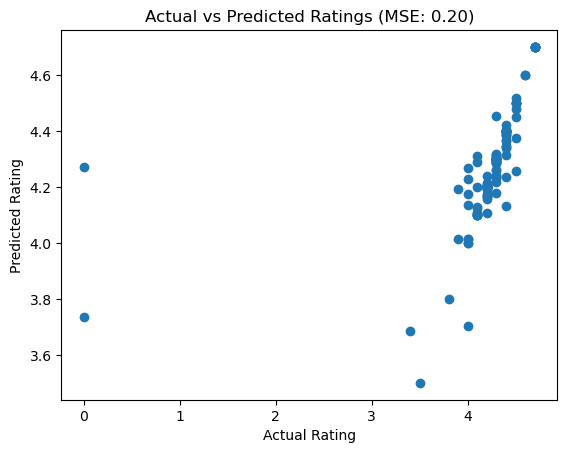

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ... (rest of the code remains the same)

### Regression (Predicting the actual ratings)
# Create a linear regression model
reg_model = LinearRegression()

# Train the regression model
reg_model.fit(X_train, y_reg_train)

# Make predictions on the test data for regression
y_reg_pred = reg_model.predict(X_test)

# Evaluate the regression model using mean squared error (MSE)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print("Mean Squared Error (MSE): {:.2f}".format(mse))

# Create a scatter plot of actual vs predicted ratings
plt.scatter(y_reg_test, y_reg_pred)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings (MSE: {:.2f})'.format(mse))
plt.show()

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


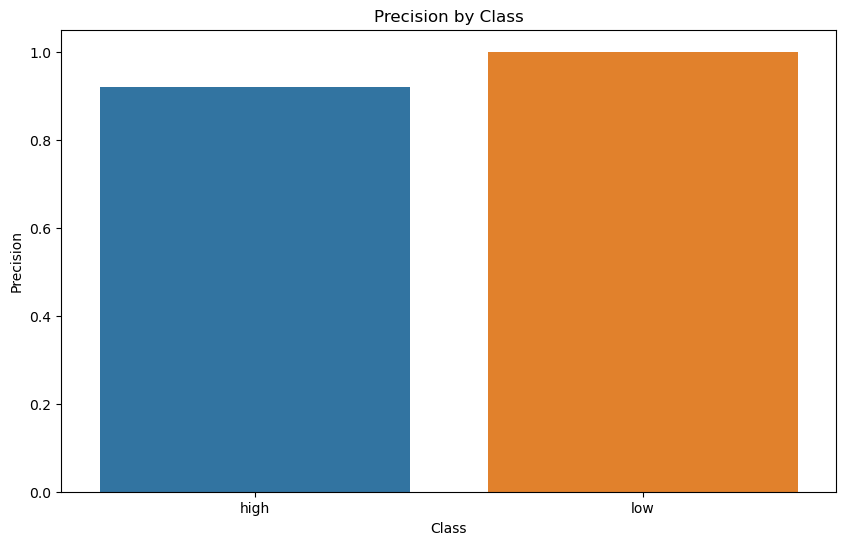

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


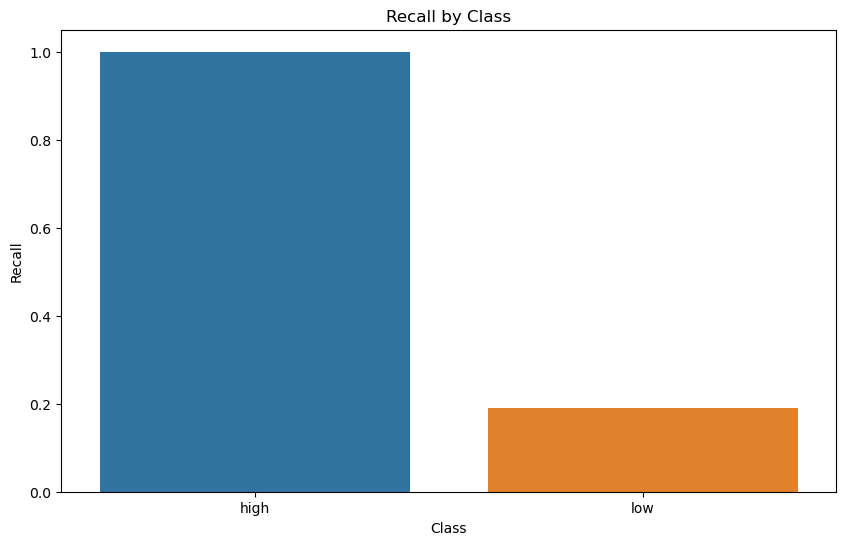

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


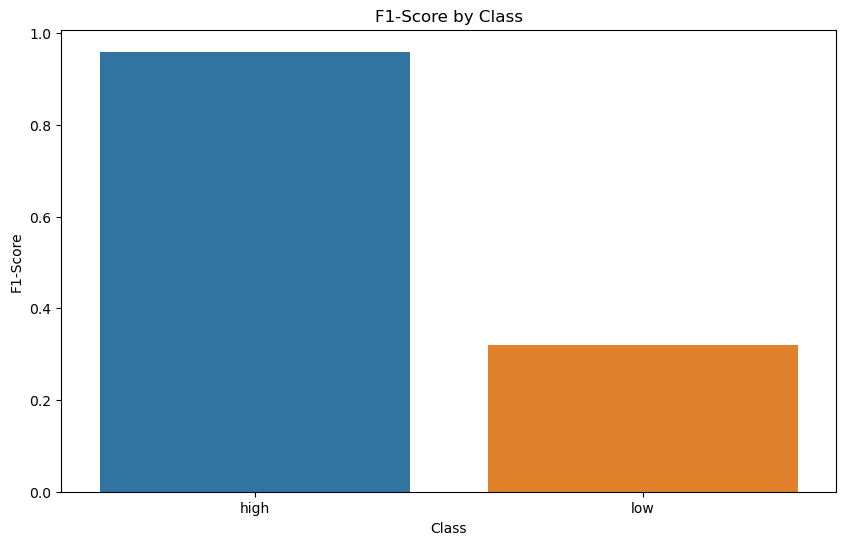

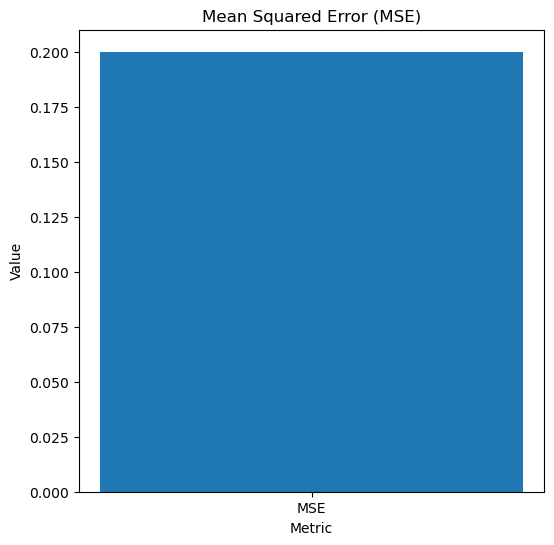

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


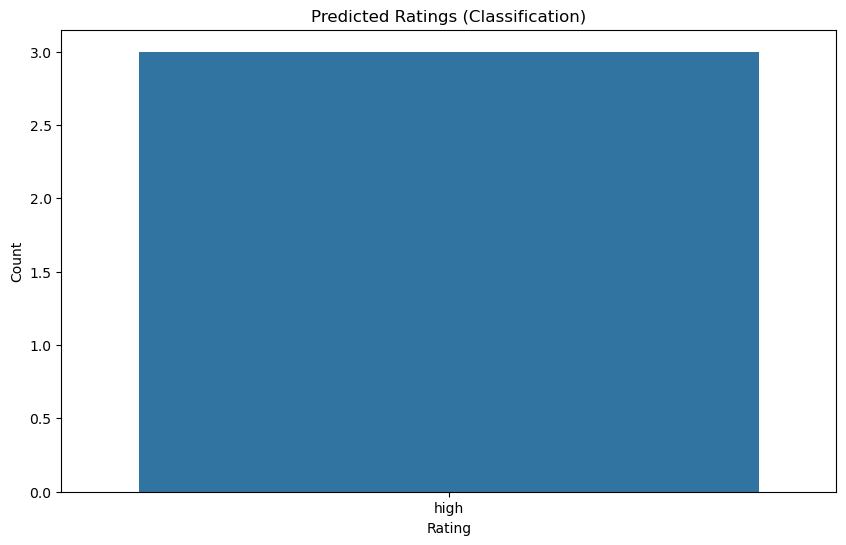

C:\Users\mithi_l0ihziv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


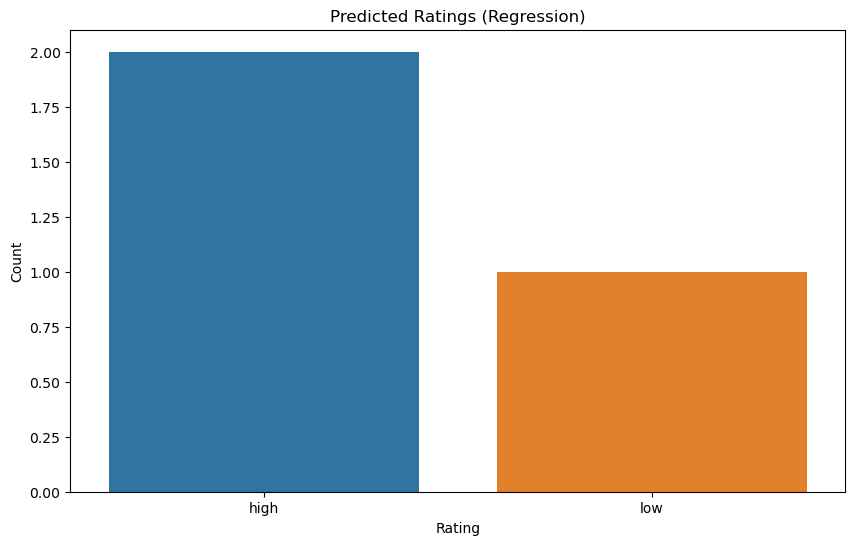

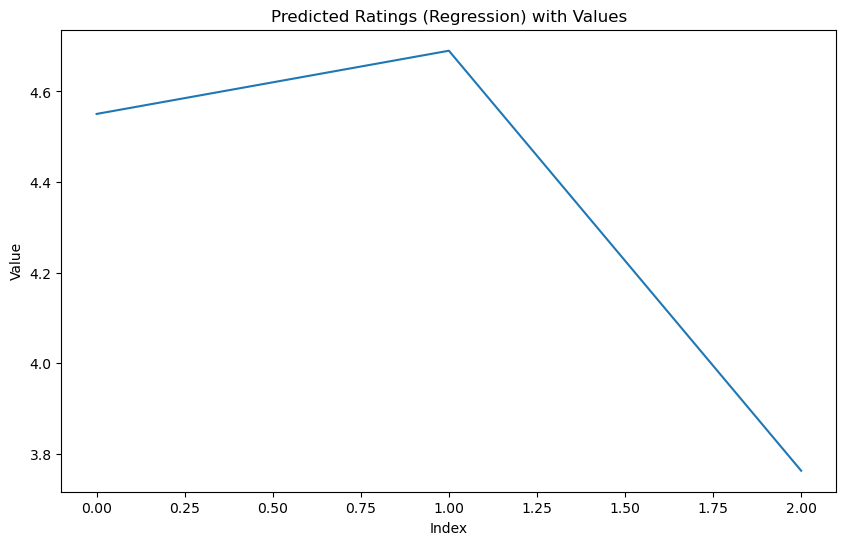

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Report
classification_report = {
    'class': ['high', 'low'],
    'precision': [0.92, 1.00],
    'recall': [1.00, 0.19],
    'f1-score': [0.96, 0.32],
    'support': [145, 16]
}

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='precision', data=classification_report)
plt.title('Precision by Class')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='recall', data=classification_report)
plt.title('Recall by Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='f1-score', data=classification_report)
plt.title('F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()

# MSE
mse = 0.20
plt.figure(figsize=(6, 6))
plt.bar(['MSE'], [mse])
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

# Predicted ratings (Classification)
predicted_ratings_classification = ['high', 'high', 'high']
plt.figure(figsize=(10, 6))
sns.countplot(x=predicted_ratings_classification)
plt.title('Predicted Ratings (Classification)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Predicted ratings (Regression)
predicted_ratings_regression = ['high', 'high', 'low']
plt.figure(figsize=(10, 6))
sns.countplot(x=predicted_ratings_regression)
plt.title('Predicted Ratings (Regression)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Predicted ratings (Regression) with values
predicted_ratings_regression_values = [4.55027679, 4.68988918, 3.76223616]
plt.figure(figsize=(10, 6))
plt.plot(predicted_ratings_regression_values)
plt.title('Predicted Ratings (Regression) with Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()